In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_recall_curve

import re
import string
import tqdm
import nltk
#nltk.download('stopwords')
#nltk.download('wordnet')
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
lemma = WordNetLemmatizer()

from keras.preprocessing.text import Tokenizer

In [9]:
#pip install sequences

In [10]:
#pip install embeddings

In [11]:
train = pd.read_csv(r'F:\Tejaswini\6th_Sem\DL\train.csv')
test =pd.read_csv(r'F:\Tejaswini\6th_Sem\DL\test.csv')
submission = pd.read_csv(r'F:\Tejaswini\6th_Sem\DL\sample_submission.csv')

In [12]:
print('There are {} rows and {} columns in train set'.format(train.shape[0],train.shape[1]))
print('There are {} rows and {} columns in test et'.format(test.shape[0],test.shape[1]))

There are 7613 rows and 5 columns in train set
There are 3263 rows and 4 columns in test et


In [13]:
train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [14]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [15]:
train.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [16]:
train.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [17]:
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [19]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,7613.0,5441.934848,3137.11609,1.0,2734.0,5408.0,8146.0,10873.0
target,7613.0,0.429660,0.49506,0.0,0.0,0.0,1.0,1.0


### Data Cleaning and Preprocessing

In [20]:
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)

def remove_emoji(text):
    emoji_pattern = re.compile(
        '['
        u'\U0001F600-\U0001F64F'  # emoticons
        u'\U0001F300-\U0001F5FF'  # symbols & pictographs
        u'\U0001F680-\U0001F6FF'  # transport & map symbols
        u'\U0001F1E0-\U0001F1FF'  # flags (iOS)
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


def remove_html(text):
    html = re.compile(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    return re.sub(html, '', text)


def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

# Applying helper functions

train['clean_text'] = train['text'].apply(lambda x: remove_URL(x))
train['clean_text'] = train['clean_text'].apply(lambda x: remove_emoji(x))
train['clean_text'] = train['clean_text'].apply(lambda x: remove_html(x))
train['clean_text'] = train['clean_text'].apply(lambda x: remove_punct(x))

In [21]:
train

,id,keyword,location,text,target,clean_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this earthquake Ma...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask Canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to shelter in place are be...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby Alaska as s...
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,Two giant cranes holding a bridge collapse int...
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,ariaahrary TheTawniest The out of control wild...
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,M194 0104 UTC5km S of Volcano Hawaii
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,Police investigating after an ebike collided w...


In [22]:
train['tokenized'] = train['clean_text'].apply(word_tokenize)

In [23]:
# import nltk
# nltk.download('punkt')

In [24]:
train.head()

,id,keyword,location,text,target,clean_text,tokenized
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this earthquake Ma...,"[Our, Deeds, are, the, Reason, of, this, earth..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask Canada,"[Forest, fire, near, La, Ronge, Sask, Canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to shelter in place are be...,"[All, residents, asked, to, shelter, in, place..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby Alaska as s...,"[Just, got, sent, this, photo, from, Ruby, Ala..."


In [25]:
train['lower'] = train['tokenized'].apply(lambda x: [word.lower() for word in x])

train['no_stopwords'] = train['lower'].apply(lambda x: [word for word in x if word not in set(nltk.corpus.stopwords.words('english'))])
train['no_stopwords'] = [' '.join(map(str, l)) for l in train['no_stopwords']]

In [26]:
train.head()

,id,keyword,location,text,target,clean_text,tokenized,lower,no_stopwords
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this earthquake Ma...,"[Our, Deeds, are, the, Reason, of, this, earth...","[our, deeds, are, the, reason, of, this, earth...",deeds reason earthquake may allah forgive us
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask Canada,"[Forest, fire, near, La, Ronge, Sask, Canada]","[forest, fire, near, la, ronge, sask, canada]",forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to shelter in place are be...,"[All, residents, asked, to, shelter, in, place...","[all, residents, asked, to, shelter, in, place...",residents asked shelter place notified officer...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation...",13000 people receive wildfires evacuation orde...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby Alaska as s...,"[Just, got, sent, this, photo, from, Ruby, Ala...","[just, got, sent, this, photo, from, ruby, ala...",got sent photo ruby alaska smoke wildfires pou...


In [27]:
test['clean_text'] = test['text'].apply(lambda x: remove_URL(x))
test['clean_text'] = test['clean_text'].apply(lambda x: remove_emoji(x))
test['clean_text'] = test['clean_text'].apply(lambda x: remove_html(x))
test['clean_text'] = test['clean_text'].apply(lambda x: remove_punct(x))

test['tokenized'] = test['clean_text'].apply(word_tokenize)

test['lower'] = test['tokenized'].apply(lambda x: [word.lower() for word in x])

test['no_stopwords'] = test['lower'].apply(lambda x: [word for word in x if word not in set(nltk.corpus.stopwords.words('english'))])

test['no_stopwords'] = [' '.join(map(str, l)) for l in test['no_stopwords']]

In [28]:
combined = train['no_stopwords'].tolist() + test['no_stopwords'].tolist()

In [29]:
len(combined)

10876

In [30]:
combined

['deeds reason earthquake may allah forgive us',
 'forest fire near la ronge sask canada',
 'residents asked shelter place notified officers evacuation shelter place orders expected',
 '13000 people receive wildfires evacuation orders california',
 'got sent photo ruby alaska smoke wildfires pours school',
 'rockyfire update california hwy 20 closed directions due lake county fire cafire wildfires',
 'flood disaster heavy rain causes flash flooding streets manitou colorado springs areas',
 'im top hill see fire woods',
 'theres emergency evacuation happening building across street',
 'im afraid tornado coming area',
 'three people died heat wave far',
 'haha south tampa getting flooded hah wait second live south tampa gon na gon na fvck flooding',
 'raining flooding florida tampabay tampa 18 19 days ive lost count',
 'flood bago myanmar arrived bago',
 'damage school bus 80 multi car crash breaking',
 'whats man',
 'love fruits',
 'summer lovely',
 'car fast',
 'goooooooaaaaaal',
 'rid

### Exploratory Data Analysis

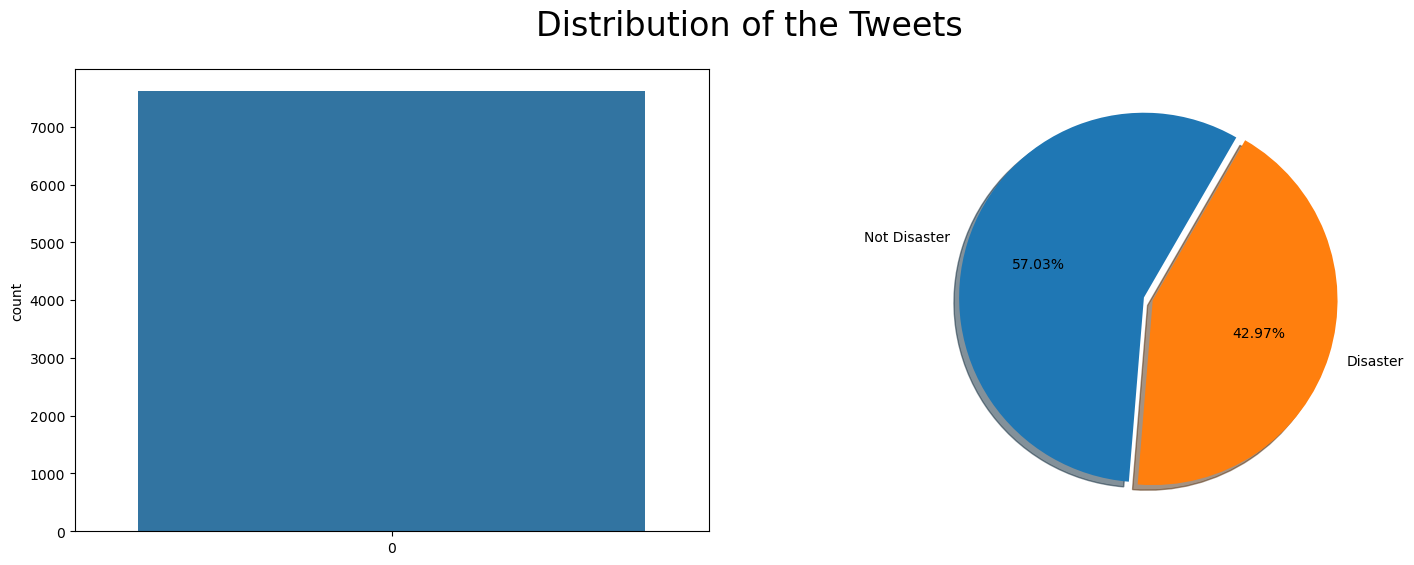

In [31]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(18, 6), dpi=100)
sns.countplot(train['target'], ax=axes[0])
axes[1].pie(train['target'].value_counts(),
            labels=['Not Disaster', 'Disaster'],
            autopct='%1.2f%%',
            shadow=True,
            explode=(0.05, 0),
            startangle=60)
fig.suptitle('Distribution of the Tweets', fontsize=24)
plt.show()

In [32]:
import nltk
stopwords = nltk.corpus.stopwords.words('english')

In [33]:
# pip install wordcloud

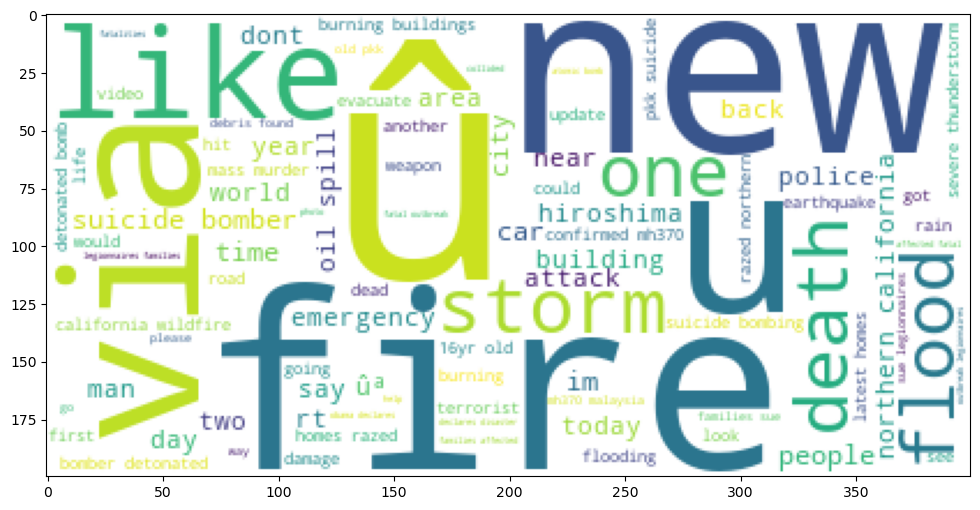

In [34]:
from wordcloud import WordCloud
plt.figure(figsize=(12,6))
text = ' '.join(train.no_stopwords[train['target']==1])
wc = WordCloud(background_color='white',stopwords=stopwords).generate(text)
plt.imshow(wc)

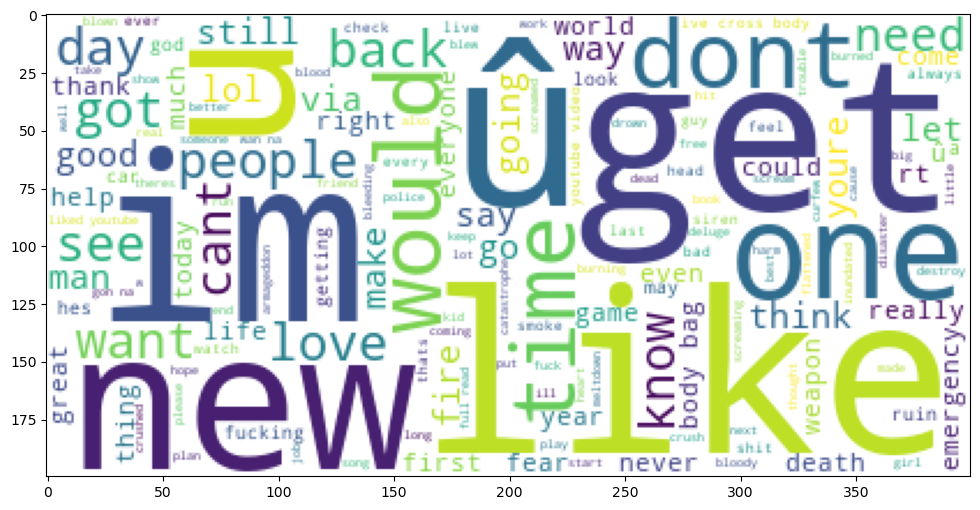

In [35]:
from wordcloud import WordCloud
plt.figure(figsize=(12,6))
text = ' '.join(train.no_stopwords[train['target']==0])
wc = WordCloud(background_color='white',stopwords=stopwords).generate(text)
plt.imshow(wc)

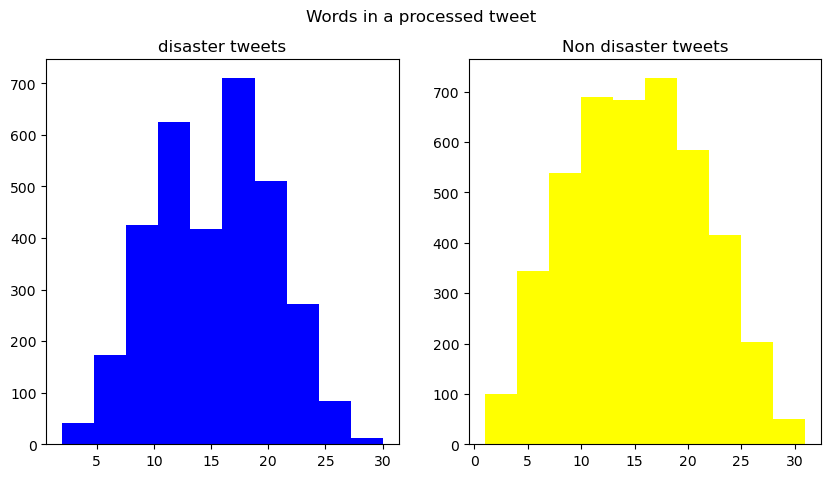

In [36]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=train[train['target']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='blue')
ax1.set_title('disaster tweets')
tweet_len=train[train['target']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='yellow')
ax2.set_title('Non disaster tweets')
fig.suptitle('Words in a processed tweet')
plt.show()

In [37]:
# pip install spacy